## Anthony Marsilio
## Professor Binowski
## Data Science Programming 262
## April 20th, 2023

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## method for requesting data (web-scraping) from football statistics webpage

def requestData(url):
    r = req.get(url)
    page = r.text
    return page

In [3]:
## method for converting web-scraping requeslts to a BeautifulSoup format

def soupIt(scrape):
    soup = bs(scrape)
    return soup

In [4]:
## neccessary team names

teamNames = ["cardinals","bears","packers","giants","lions","redskins","eagles",
             "steelers","rams","49ers","browns","colts","cowboys","chiefs","chargers",
             "broncos","jets","patriots","raiders","titans","bills","vikings","falcons",
             "dolphins","saints","bengals","seahawks","buccaneers","panthers","jaguars",
             "ravens","texans"]

In [5]:
## method that cleans up the souped data, honing in on the useful score data
## by selecting a subset of that initial soup of our scrape


def getScores(soup):
    scores = soup.find_all('table', attrs = {"width":"70%"})
    return scores

#stepOne = getScores(souped)

In [6]:
## method, again honing in on our useful score data
## again, selecting a subset of that intial soup of our scrape

def scrapeCleaner(soup):
    scoresString = ''
    for elmt in soup:
        scoresString += str(elmt)
    splitScores = scoresString.split("<td>")

    replaced = []
    replacedII =[]
    replacedIII = []
    replacedIV = []
    replacedV = []
    replacedVI = []
    for word in splitScores:
        replaced.append(word.replace("</td>", " "))
    for word in replaced:
        replacedII.append(word.replace("<tr>", " "))
    for word in replacedII:
        replacedIII.append(word.replace("</tr>", " "))
    for word in replacedIII:
        replacedIV.append(word.replace("\n", " "))
    for word in replacedIV:
        replacedV.append(word.replace('<table border="0" cellpadding="0" cellspacing="0" width="70%">', " "))
    for word in replacedV:
        replacedVI.append(word.replace('</table>', " "))



    
    stripped = []
    for word in replacedVI:
        stripped.append(word.strip())

    return stripped

#stepTwo = scrapeCleaner(stepOne)

In [7]:
## method making a list of solely the integer scores (note these integer scores are still technically of STRING type)

def intList(teamScoreList):
    justScores = []
    indi = 0

    for elem in teamScoreList:
        if elem.lower() in teamNames:
            #justScores.append(stripped[indi])
            justScores.append(teamScoreList[indi+1])
            justScores.append(teamScoreList[indi+2])
            justScores.append(teamScoreList[indi+3])
            justScores.append(teamScoreList[indi+4])
        indi += 1
    return justScores

#stepThree = intList(stepTwo)


In [8]:
## method for identifyinging the ones-place digit of an integer

def lastDigit(num):
    last_digit = num % 10
    return int(last_digit)


In [9]:
## setting up the array for the rough working heat map

bowl1_57 = np.full((10,10), 0)
bowl1_57

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
## method which makes takes an array and adds up a count of instances of
## a score being each particular combination


def fillArrayQrtOne(listOfScores, array):
    indexer = 0
    burner = 0
    burner2 = 0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        array[burnY,burnY2] += 1
    
    return array


def fillArrayQrtTwo(listOfScores, array):
    indexer = 1
    burner = 0
    burner2 = 0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        array[burnY,burnY2] += 1
    
    return array

def fillArrayQrtThree(listOfScores, array):
    indexer = 2
    burner = 0
    burner2 = 0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        array[burnY,burnY2] += 1
    
    return array

def fillArrayQrtFour(listOfScores, array):
    indexer = 3
    burner = 0
    burner2 = 0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        array[burnY,burnY2] += 1
    
    return array
        



In [11]:
## the list of links containing data for Super Bowl 1-57 linkList = ['https://www.printyourbrackets.com/box-scores-for-super-bowl-1-through-10.html',
linkList = ['https://www.printyourbrackets.com/box-scores-for-super-bowl-11-through-20.html',
            'https://www.printyourbrackets.com/box-scores-for-super-bowl-21-through-30.html',
            'https://www.printyourbrackets.com/box-scores-for-super-bowl-31-through-40.html',
            'https://www.printyourbrackets.com/box-scores-for-super-bowl-41-through-50.html',
            'https://www.printyourbrackets.com/box-scores-for-super-bowl-51-through-60.html']

In [12]:
## pass complete list of links and this returns a list of integer scores
def totalScrape(linkList):
    totalIntList = []
    for link in linkList:
        scrape = requestData(link)
        souped = soupIt(scrape)
        stepOne = getScores(souped)
        stepTwo = scrapeCleaner(stepOne)
        totalIntList.extend(intList(stepTwo))
    return totalIntList


## fill array with quarter one scores
def qtrOneMethod(linkList, array):
    
    filledArray = fillArray(linkList, array)
    return filledArray

## FINAL RUN

listOfScores = totalScrape(linkList)
bowl1_57 = fillArrayQrtOne(listOfScores, bowl1_57)
bowl1_57 = fillArrayQrtTwo(listOfScores, bowl1_57)
bowl1_57 = fillArrayQrtThree(listOfScores, bowl1_57)
bowl1_57 = fillArrayQrtFour(listOfScores, bowl1_57)




AxesSubplot(0.125,0.11;0.62x0.77)


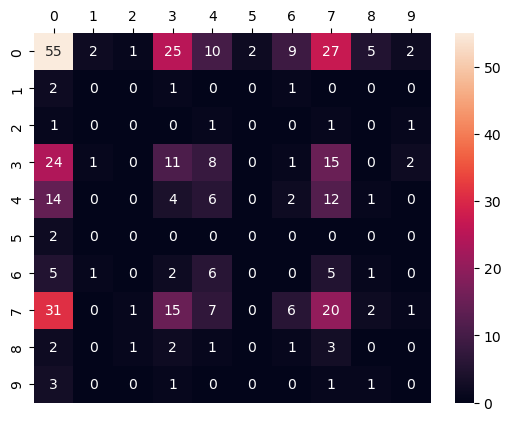

In [13]:
## here, just taking a progress check

grap = sns.heatmap(bowl1_57, annot= True)

grap.xaxis.tick_top()
print(grap)

## 
## 

## The key chart for this data science analysis is below. That is, a frequency heat map of end-of-quarter winning box locations. 

## It's immediately apparent that there is a big disparity in frequency. Obviously 0, 3, and 7 are hot numbers to select for a winning-chance.

AxesSubplot(0.125,0.11;0.775x0.77)


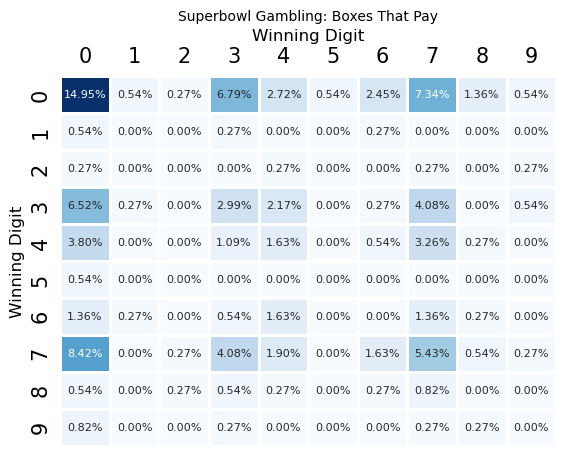

In [14]:
percentArray = bowl1_57 ## saving work in an intermediate step
percentArrayCopy = percentArray / percentArray.sum() ## transfroming array into a structure about proportions


## creating heat map
grap2 = sns.heatmap(percentArrayCopy, 
                    annot= True, 
                    fmt=".2%", 
                    annot_kws = {'fontsize':8},
                    linewidth=1,
                    cbar = False, 
                    cmap = "Blues")


grap2.set_title("Superbowl Gambling: Boxes That Pay",fontsize = 10)
grap2.set_xlabel("Winning Digit",fontsize=12)
grap2.set_ylabel("Winning Digit",fontsize=12)

grap2.xaxis.set_label_position('top')


grap2.tick_params(axis='both', which='major', labelsize=15, 
                  labelbottom = False, bottom=False, 
                  top = False, labeltop=True, 
                  labelleft = True, left = False)


print(grap2)

## 
## here, methods which compute the average combined score (score of Team A + score of Team B) across 1st, 2nd, 3rd, and 4th quarters:

## (note: Q2, Q3, and Q4 methods build off of the Q1 method by just referencing additional list items in our data and summing them into the figure used for the average)

In [15]:
def qtrOneAverageScore(listOfScores):
    indexer = 0
    count = 0
    scoreSum = 0

    while indexer <= (len(listOfScores)-1):
        scoreSum += int(listOfScores[indexer])
        indexer += 4
        count += 1
        
    avgGameScore = scoreSum / (count/2)
    return avgGameScore

qtrOneAverageScore(listOfScores)

9.053763440860216

In [16]:
def qtrTwoAverageScore(listOfScores):
    indexer = 0
    indexer2 = 1
    count = 0
    qOneSum = 0
    qTwoSum = 0
    totalSum = 0

    while indexer <= ((len(listOfScores)-1)):
        qOneSum += int(listOfScores[indexer])
        indexer += 4

    while indexer2 <= ((len(listOfScores)-1)):
        qTwoSum += int(listOfScores[indexer2])
        indexer2 += 4
        count += 1
    
    totalSum = qOneSum + qTwoSum
    avgGameScore = totalSum / (count/2)
    
    return avgGameScore

qtrTwoAverageScore(listOfScores)

23.13978494623656

In [17]:
def qtrThreeAverageScore(listOfScores):
    indexer = 0
    indexer2 = 1
    indexer3 = 2
    count = 0
    qOneSum = 0
    qTwoSum = 0
    qThreeSum = 0
    totalSum = 0
    
    while indexer <= ((len(listOfScores)-1)):
        qOneSum += int(listOfScores[indexer])
        indexer += 4

    while indexer2 <= ((len(listOfScores)-1)):
        qTwoSum += int(listOfScores[indexer2])
        indexer2 += 4

    while indexer3 <= ((len(listOfScores)-1)):
        qThreeSum += int(listOfScores[indexer3])
        indexer3 += 4
        count += 1
    totalSum = (qOneSum + qTwoSum + qThreeSum)
    avgGameScore = totalSum / (count/2)
    
    return avgGameScore

qtrThreeAverageScore(listOfScores)

34.75268817204301

In [18]:
def qtrFourAverageScore(listOfScores):
    indexer = 0
    indexer2 = 1
    indexer3 = 2
    indexer4 = 3
    count = 0
    qOneSum = 0
    qTwoSum = 0
    qThreeSum = 0
    qFourSum = 0
    totalSum = 0
    
    while indexer <= ((len(listOfScores)-1)):
        qOneSum += int(listOfScores[indexer])
        indexer += 4

    while indexer2 <= ((len(listOfScores)-1)):
        qTwoSum += int(listOfScores[indexer2])
        indexer2 += 4

    while indexer3 <= ((len(listOfScores)-1)):
        qThreeSum += int(listOfScores[indexer3])
        indexer3 += 4
        
    while indexer4 <= ((len(listOfScores)-1)):
        qFourSum += int(listOfScores[indexer4])
        indexer4 += 4
        count += 1
        
    totalSum = (qOneSum + qTwoSum + qThreeSum + qFourSum)
    avgGameScore = totalSum / (count/2)
    
    return avgGameScore

qtrFourAverageScore(listOfScores)

49.61290322580645

## 



## the following chart displays the average Combined Score (score of Team A + score of Team B) at End-of-quarter for all 57 Super Bowls. 

## We can observe that at half-time there is typically a combined score of about 20 points, and games usually climb to about 45 points for the final.

In [19]:
## making a dataframe for the purpose of graphing with seaborn

d = {'Quarter 1': [qtrOneAverageScore(listOfScores)], 'Quarter 2': [qtrTwoAverageScore(listOfScores)],
     'Quarter 3': [qtrThreeAverageScore(listOfScores)], 'Quarter 4': [qtrFourAverageScore(listOfScores)]}

df = pd.DataFrame(data=d)

df

,Quarter 1,Quarter 2,Quarter 3,Quarter 4
0,9.053763,23.139785,34.752688,49.612903


Text(0, 0.5, 'Combined Score at End-of-quarter')

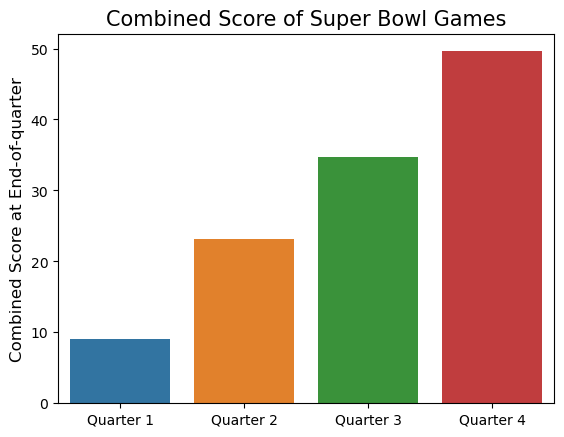

In [20]:
## graphing the above df with seaborn
g = sns.barplot(
    data=df)
g.set_title('Combined Score of Super Bowl Games',fontsize = 15)
g.set_ylabel('Combined Score at End-of-quarter',fontsize=12)

## 
## 

## how often is the end-of-quarter score of each team even and how often is it odd?


In [21]:
## the even odd digit calculator

def isEven(num):
    var = True
    if num % 2 == 0:
        var = True
    else:
        var = False
    return var

In [22]:
parity = np.full((1,2), 0) ## making the array to be filled with our data


## the below methods take a look at the score of each game for each team, at the end
## of each quarter, and in each of those steps determines if that score is even or odd
def parityCalcQrtOne(listOfScores, array):
    indexer = 0
    burner = 0
    burner2 = 0
    score = 0
    score2 =0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        
        
        if isEven(burnY):
            array[0,0] += 1
        else:
            array[0,1] += 1
        
    
    return array

def parityCalcQrtTwo(listOfScores, array):
    indexer = 1
    burner = 0
    burner2 = 0
    score = 0
    score2 =0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        
        
        if isEven(burnY):
            array[0,0] += 1
        else:
            array[0,1] += 1
        
    
    return array

def parityCalcQrtThree(listOfScores, array):
    indexer = 2
    burner = 0
    burner2 = 0
    score = 0
    score2 =0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        
        
        if isEven(burnY):
            array[0,0] += 1
        else:
            array[0,1] += 1
        
    
    return array

def parityCalcQrtFour(listOfScores, array):
    indexer = 3
    burner = 0
    burner2 = 0
    score = 0
    score2 =0

    while (indexer <= len(listOfScores)-1) and (indexer+4 <= len(listOfScores)-1):
        burner = listOfScores[indexer]
        burner2 = listOfScores[indexer+4]
        indexer += 4
        burnY = lastDigit(int(burner))
        burnY2 = lastDigit(int(burner2))
        
        
        if isEven(burnY):
            array[0,0] += 1
        else:
            array[0,1] += 1
        
    
    return array

parityCalcQrtOne(listOfScores, parity)
parityCalcQrtTwo(listOfScores, parity)
parityCalcQrtThree(listOfScores, parity)
parityCalcQrtFour(listOfScores, parity)

array([[211, 157]])

In [23]:
## using the parity array to fill an even and odd variable
even = parity[0,0]
odd = parity[0,1]

In [24]:
## creating a data frame for plotting on a sea born chart

d2 = {'Even': [even], 'Odd': [odd]}

evenOdd = pd.DataFrame(data= d2)

evenOdd

,Even,Odd
0,211,157


Text(0, 0.5, 'Count of Scores With Even or Odd Digit')

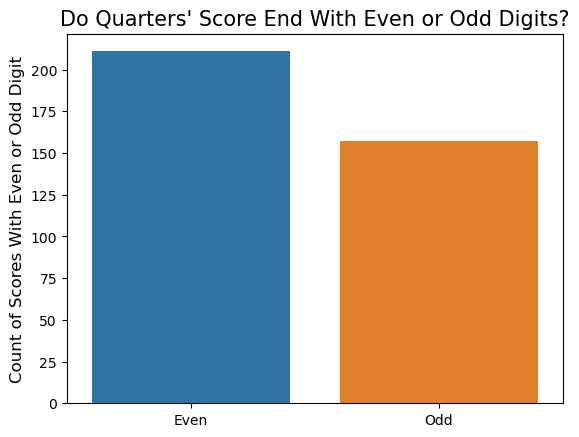

In [25]:
## graphing with seaborn

g = sns.barplot(
    data=evenOdd)
g.set_title('Do Quarters\' Score End With Even or Odd Digits?',fontsize = 15)
g.set_ylabel('Count of Scores With Even or Odd Digit',fontsize=12)

## 


## as seen above, even digits lead the count by a significant margin.

## 

## Finally, we will take a look at what the average number of total game points scored per quarter in any given quarter across the Super Bowl history:

In [26]:
## setting up variables to hold our data
scor = 0
scor2 = 0
scor3 = 0
scor4 = 0

scor = qtrOneAverageScore(listOfScores)
scor2 = qtrTwoAverageScore(listOfScores) - qtrOneAverageScore(listOfScores)
scor3 = qtrThreeAverageScore(listOfScores) - qtrTwoAverageScore(listOfScores)
scor4 = qtrFourAverageScore(listOfScores) - qtrThreeAverageScore(listOfScores)

In [27]:
## making a data frame for the average total-game quarterly point game

d3 = {'Quarter One': [scor], 'Quarter Two': [scor2],
      'Quarter Three' : [scor3], 'Quarter Four' : [scor4]}

quarters = pd.DataFrame(data= d3)

quarters

,Quarter One,Quarter Two,Quarter Three,Quarter Four
0,9.053763,14.086022,11.612903,14.860215


Text(0, 0.5, 'Total Game Count of Scores')

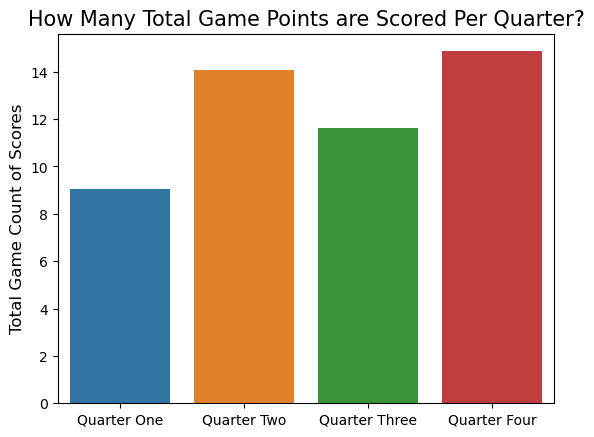

In [28]:
## graphing with with seaborn with the above dataframe

g = sns.barplot(
    data=quarters)
g.set_title('How Many Total Game Points are Scored Per Quarter?',fontsize = 15)
g.set_ylabel('Total Game Count of Scores',fontsize=12)

## above we can see that the number of points scored by both teams during the average quarter has little deviation. If divided by two, it seems to suggest each team scores a touchdown + extra point per quarter. Of course this will vary greatly from game to game and is a mild observation.